# 03 - Exploratory Data Analysis (EDA)

Goal:
- Load preprocessed sales data
- Visualize time series
- Seasonal decomposition (trend, seasonality, residuals)
- Check stationarity using Augmented Dickey-Fuller (ADF) test
- Plot ACF & PACF for ARIMA parameter hints


## Weekly EDA

Goal:
- Explore sales aggregated at weekly frequency
- Identify medium-term trends and yearly seasonality
- Check if the series is stationary
- Use ACF/PACF to get hints for ARIMA parameters
- Choose weekly as the baseline granularity for modeling (balances noise vs smoothness)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Load weekly data
file_path = "../data/processed/sales_weekly.csv"
sales_weekly = pd.read_csv(file_path, parse_dates=['order_date'], index_col='order_date')

print("Shape:", sales_weekly.shape)
sales_weekly.head()


Shape: (209, 1)


,sales
order_date,
2015-01-04,304.508
2015-01-11,4619.108
2015-01-18,4130.533
2015-01-25,3092.544
2015-02-01,2527.914


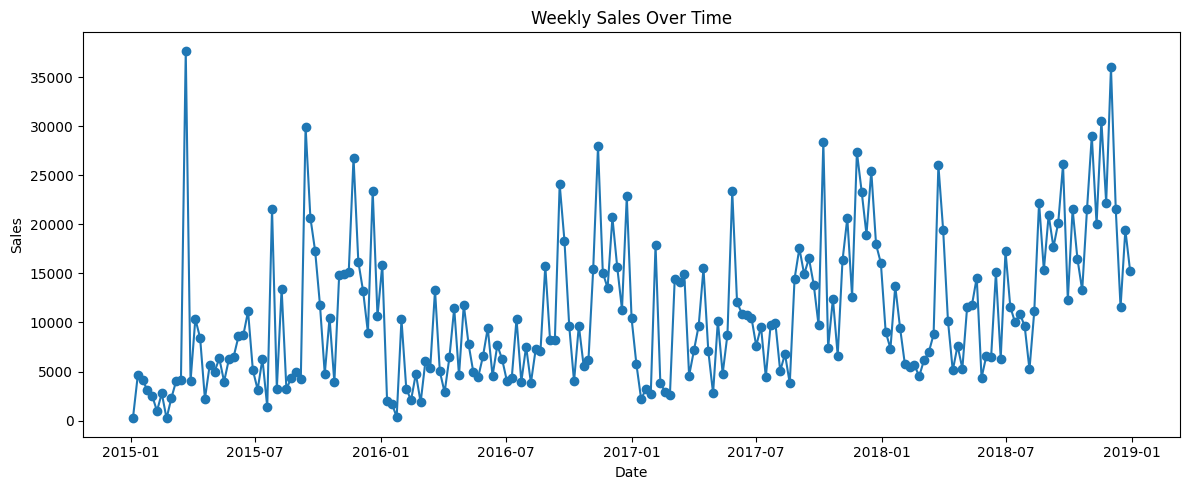

In [3]:
plt.figure(figsize=(12,5))
plt.plot(sales_weekly.index, sales_weekly['sales'], marker='o')
plt.title("Weekly Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.tight_layout()
plt.show()


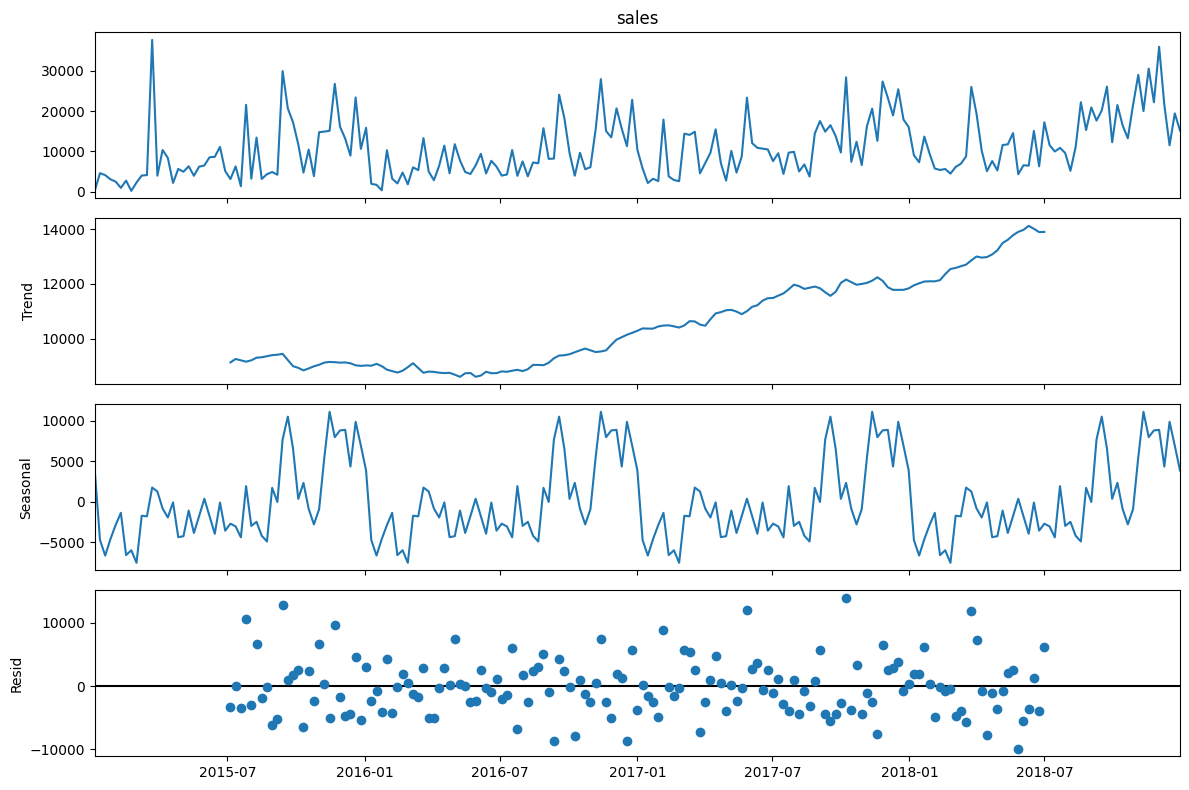

In [5]:
# Decompose into trend, seasonality, residuals
result = seasonal_decompose(sales_weekly['sales'], model='additive', period=52)  # ~52 weeks in a year
fig = result.plot()
fig.set_size_inches(12, 8)
plt.tight_layout()
plt.show()


In [7]:
# Augmented Dickey-Fuller test
adf_result = adfuller(sales_weekly['sales'].dropna())

print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])
print("Critical Values:", adf_result[4])

if adf_result[1] < 0.05:
    print("✅ The series is stationary (reject null hypothesis).")
else:
    print("❌ The series is NOT stationary (fail to reject null hypothesis).")


ADF Statistic: -5.925720083518566
p-value: 2.4464706141374393e-07
Critical Values: {'1%': np.float64(-3.4623415245233145), '5%': np.float64(-2.875606128263243), '10%': np.float64(-2.574267439846904)}
✅ The series is stationary (reject null hypothesis).


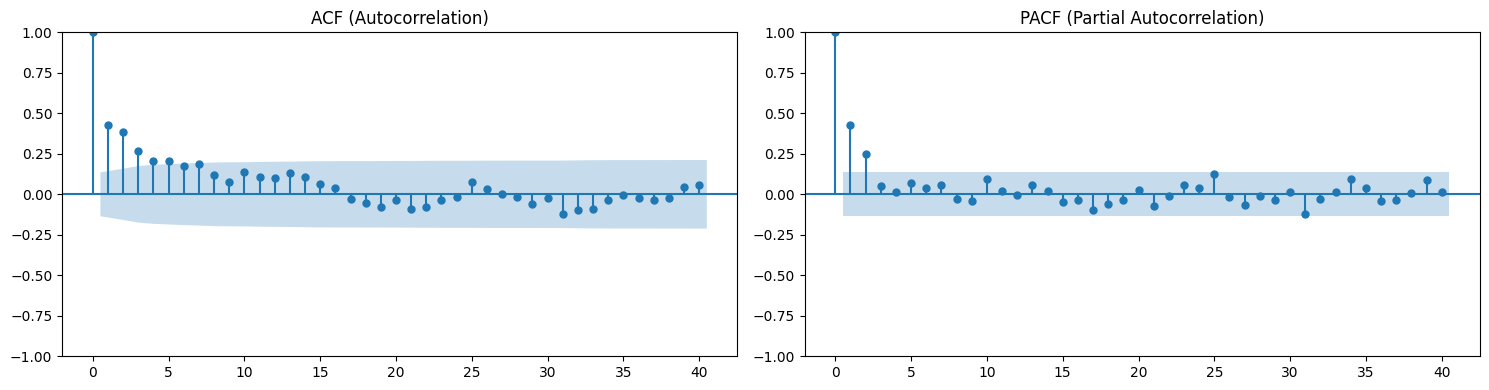

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(15,4))

plot_acf(sales_weekly['sales'].dropna(), lags=40, ax=axes[0])
plot_pacf(sales_weekly['sales'].dropna(), lags=40, ax=axes[1], method='ywm')

axes[0].set_title("ACF (Autocorrelation)")
axes[1].set_title("PACF (Partial Autocorrelation)")
plt.tight_layout()
plt.show()


## Daily EDA

Goal:
- Explore sales at daily frequency
- Identify noise, short-term seasonality, and trend
- Check stationarity
- Prepare for daily ARIMA/Prophet later


In [11]:
# Load daily data
sales_daily = pd.read_csv("../data/processed/sales_daily.csv",
                          parse_dates=['order_date'], index_col='order_date')

print("Daily series length:", len(sales_daily))
sales_daily.head()


Daily series length: 1458


,sales
order_date,
2015-01-03,16.448
2015-01-04,288.060
2015-01-05,19.536
2015-01-06,4407.100
2015-01-07,87.158


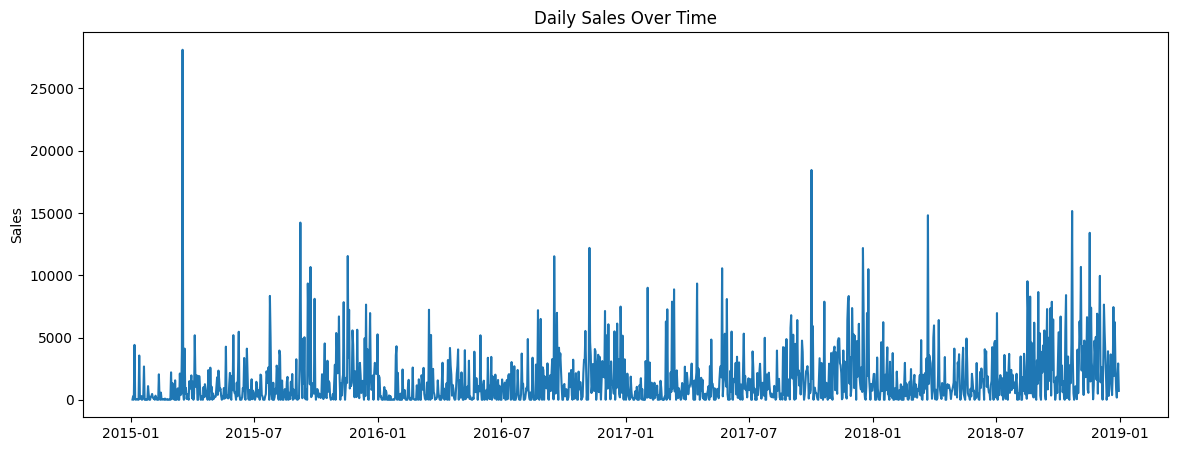

In [13]:
# Plot daily sales
plt.figure(figsize=(14,5))
plt.plot(sales_daily.index, sales_daily['sales'])
plt.title("Daily Sales Over Time")
plt.ylabel("Sales")
plt.show()


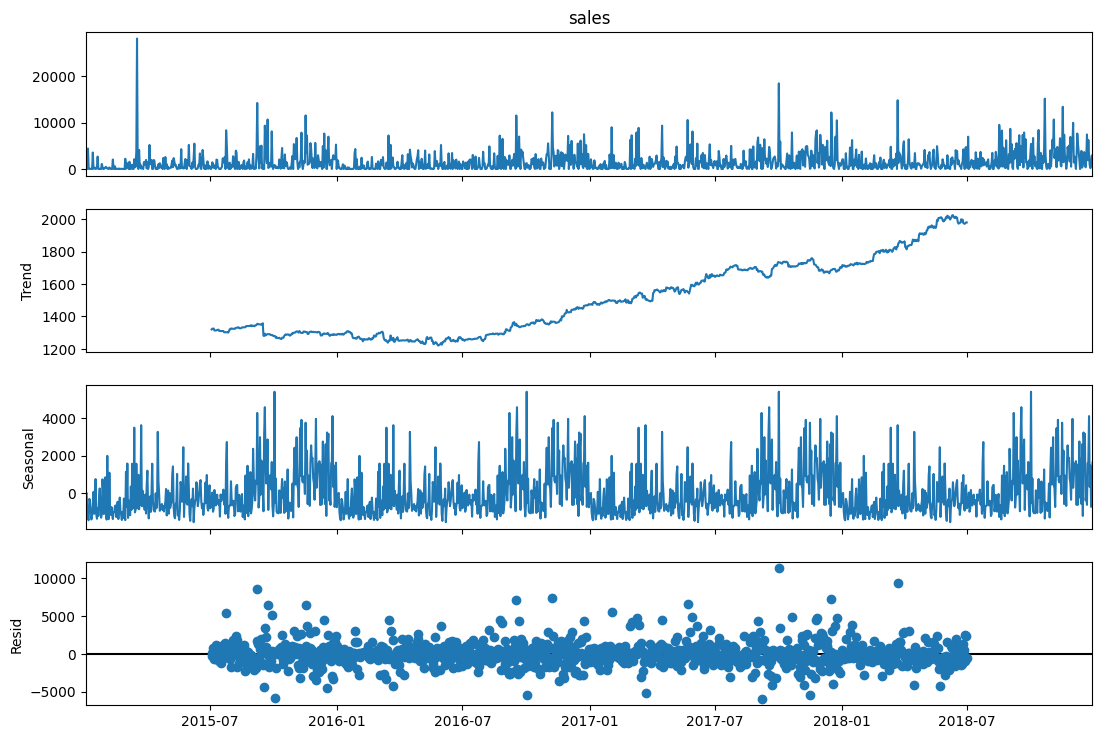

In [15]:
# Seasonal decomposition (period=365 ~ yearly)
result = seasonal_decompose(sales_daily['sales'], model='additive', period=365)
fig = result.plot()
fig.set_size_inches(12,8)
plt.show()


In [17]:
# ADF test
adf_result = adfuller(sales_daily['sales'].dropna())
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])
print("Critical Values:", adf_result[4])


ADF Statistic: -4.926583375196236
p-value: 3.094891245873642e-05
Critical Values: {'1%': np.float64(-3.434908816804013), '5%': np.float64(-2.863553406963303), '10%': np.float64(-2.5678419239852994)}


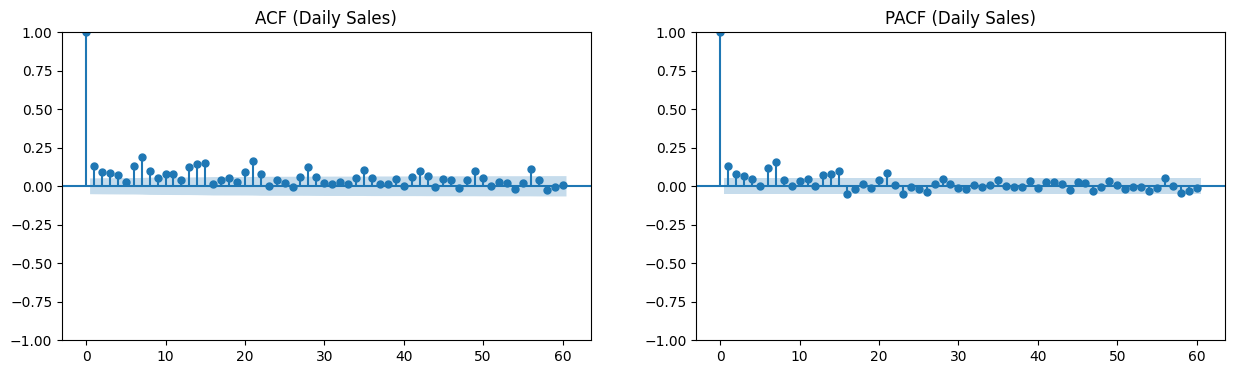

In [19]:
# ACF & PACF
fig, axes = plt.subplots(1, 2, figsize=(15,4))
plot_acf(sales_daily['sales'].dropna(), lags=60, ax=axes[0])
plot_pacf(sales_daily['sales'].dropna(), lags=60, ax=axes[1], method='ywm')
axes[0].set_title("ACF (Daily Sales)")
axes[1].set_title("PACF (Daily Sales)")
plt.show()


## Monthly EDA

Goal:
- Explore sales at monthly frequency
- Identify long-term growth trend
- Highlight yearly seasonality
- Check stationarity and autocorrelation


In [23]:
# Load monthly data
sales_monthly = pd.read_csv("../data/processed/sales_monthly.csv",
                            parse_dates=['order_date'], index_col='order_date')

print("Monthly series length:", len(sales_monthly))
sales_monthly.head()


Monthly series length: 48


,sales
order_date,
2015-01-31,14205.707
2015-02-28,4519.892
2015-03-31,55205.797
2015-04-30,27906.855
2015-05-31,23644.303


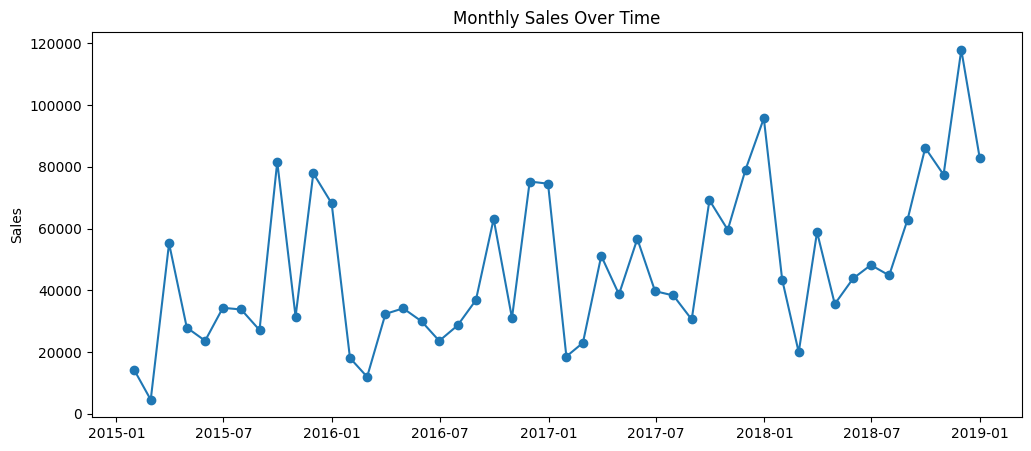

In [25]:
# Plot monthly sales
plt.figure(figsize=(12,5))
plt.plot(sales_monthly.index, sales_monthly['sales'], marker='o')
plt.title("Monthly Sales Over Time")
plt.ylabel("Sales")
plt.show()


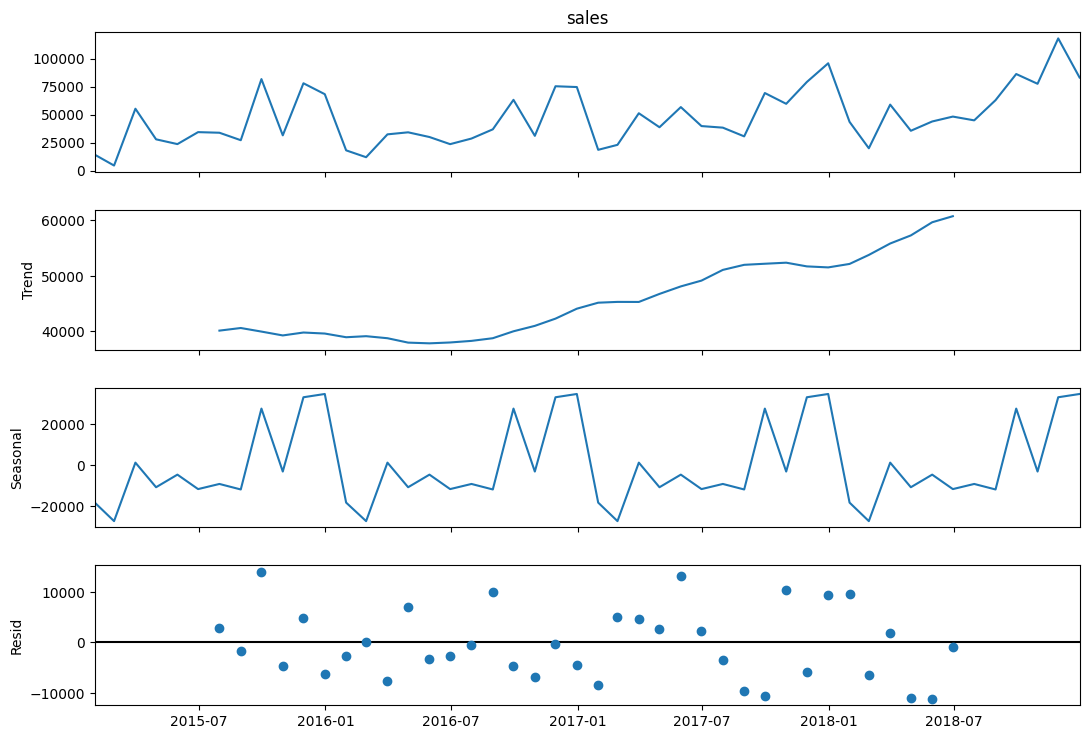

In [27]:
# Seasonal decomposition (period=12 ~ yearly cycle)
result = seasonal_decompose(sales_monthly['sales'], model='additive', period=12)
fig = result.plot()
fig.set_size_inches(12,8)
plt.show()


In [29]:
# ADF test
adf_result = adfuller(sales_monthly['sales'].dropna())
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])
print("Critical Values:", adf_result[4])


ADF Statistic: -4.416136761430769
p-value: 0.00027791039276670623
Critical Values: {'1%': np.float64(-3.5778480370438146), '5%': np.float64(-2.925338105429433), '10%': np.float64(-2.6007735310095064)}


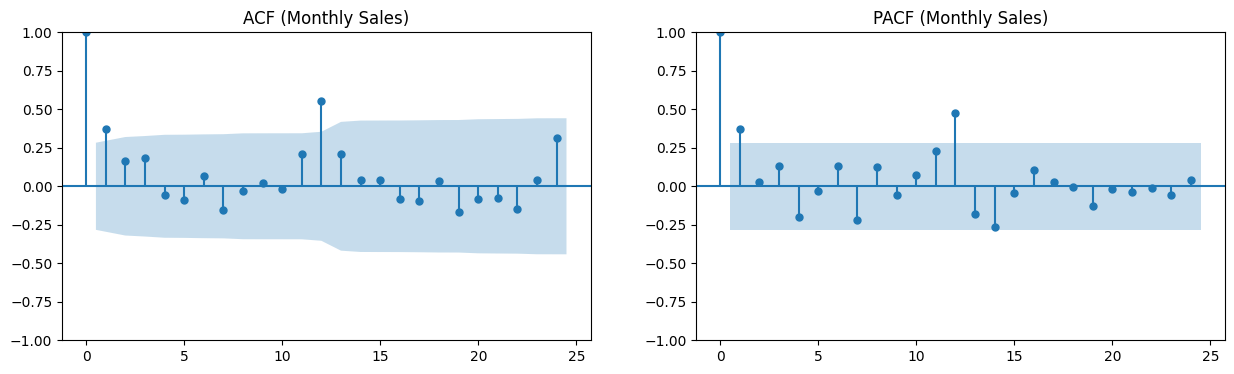

In [31]:
# ACF & PACF
fig, axes = plt.subplots(1, 2, figsize=(15,4))
plot_acf(sales_monthly['sales'].dropna(), lags=24, ax=axes[0])
plot_pacf(sales_monthly['sales'].dropna(), lags=24, ax=axes[1], method='ywm')
axes[0].set_title("ACF (Monthly Sales)")
axes[1].set_title("PACF (Monthly Sales)")
plt.show()


# Exploratory Data Analysis (Daily, Weekly, Monthly)

## Daily EDA
**Goal:**  
- Explore sales at daily frequency.  
- Capture short-term variations and holiday effects.  
- Check stationarity and short-term autocorrelations.  

**Observations:**  
- Very noisy series with frequent spikes.  
- Trend shows consistent upward growth.  
- Seasonal effects exist but are masked by noise.  
- ADF test → stationary (p < 0.05).  
- ACF decays gradually, PACF spike at lag 1 → candidate models: ARIMA(1,0,1), ARIMA(2,0,1).

---

## Weekly EDA
**Goal:**  
- Explore sales aggregated at weekly frequency.  
- Identify medium-term trends and yearly seasonality.  
- Check stationarity and use ACF/PACF for ARIMA hints.  
- Establish weekly as the baseline for modeling (balance between noise and smoothness).  

**Observations:**  
- Smoother than daily, with visible yearly seasonality.  
- Trend: clear growth 2016–2018.  
- ADF test → non-stationary, differencing required (d=1).  
- ACF decays slowly, PACF spikes at lags 1–3 → candidate models: ARIMA(1,1,1), ARIMA(2,1,1), ARIMA(3,1,2).

---

## Monthly EDA
**Goal:**  
- Explore sales aggregated at monthly frequency.  
- Highlight long-term growth and yearly cycles.  
- Check stationarity and seasonal correlations.  

**Observations:**  
- Very smooth with clear long-term growth.  
- Seasonal peaks visible around year-end.  
- ADF test → stationary (p < 0.05).  
- ACF shows seasonal spikes (~12 months), PACF confirms → candidate models: SARIMA with yearly seasonality (s=12).

---

## Conclusion
- **Daily data**: too noisy, useful for short-term forecasts but harder to model.  
- **Weekly data**: best balance between detail and smoothness → chosen for initial ARIMA/Prophet modeling.  
- **Monthly data**: very smooth, best for long-term planning, needs SARIMA or Prophet with yearly seasonality.
